# OnlineSalesBusiness

## Data Import

In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

mpl.style.use(['ggplot'])

In [4]:
df_osb = pd.read_excel('https://drive.google.com/uc?id=1ykh_2upwO2qoXmKufssrXWqQimEJZjon')
df_osb.head(3)

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.0,-1609.0,12732.0
1,Basket,13,3744.0,-316.8,0.0,3427.2
2,Basket,12,3825.0,-201.6,-288.0,3335.4


In [5]:
df_osb.shape

(1775, 6)

In [6]:
df_osb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


## Data Preprocessing

Melakukan Drop untuk Missing Value. Hanya ada 8 missing value, jadi lebih baik dilakukan drop

In [7]:
df_osb[df_osb['Product Type'].isnull()]

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
550,NaN,1,158.0,0.0,0.0,158.0
703,NaN,1,128.0,0.0,0.0,128.0
1028,NaN,1,75.0,0.0,0.0,75.0
1030,NaN,1,75.0,0.0,0.0,75.0
1287,NaN,1,48.0,0.0,0.0,48.0
1370,NaN,1,42.0,0.0,0.0,42.0
1618,NaN,1,24.0,0.0,0.0,24.0
1761,NaN,1,10.5,0.0,0.0,10.5


In [8]:
df_osb.dropna(inplace=True)
df_osb.shape

(1767, 6)

Mengganti format angka menjadi 2 di belakang koma, agar konsisten

In [9]:
pd.options.display.float_format = "{:,.2f}".format
df_osb.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,"14,935.00",-594.00,"-1,609.00","12,732.00"
1,Basket,13,"3,744.00",-316.80,0.00,"3,427.20"
2,Basket,12,"3,825.00",-201.60,-288.00,"3,335.40"
3,Basket,17,"3,035.00",-63.25,0.00,"2,971.75"
4,Art & Sculpture,47,"2,696.80",-44.16,0.00,"2,652.64"


Memvalidasi agar jumlah Gross Sales + Discounts + Returns = Total Net Sales

In [10]:
valid = np.round(df_osb['Gross Sales'] + df_osb['Discounts'] + df_osb['Returns'], decimals=2) == df_osb['Total Net Sales']
valid.value_counts()

True    1767
dtype: int64

## Produk Terjual

In [11]:
banyak_produk = df_osb.groupby("Product Type")['Net Quantity'].sum().sort_values(ascending=False)
banyak_produk

Product Type
Basket              1461
Art & Sculpture     1427
Jewelry              991
Kitchen              809
Christmas            575
Home Decor           404
Soapstone            199
Kids                 140
Fair Trade Gifts     110
Skin Care            101
Recycled Art          99
Music                 98
Accessories           84
Textiles              43
Furniture             27
One-of-a-Kind         12
Easter                 1
Gift Baskets           1
Name: Net Quantity, dtype: int64

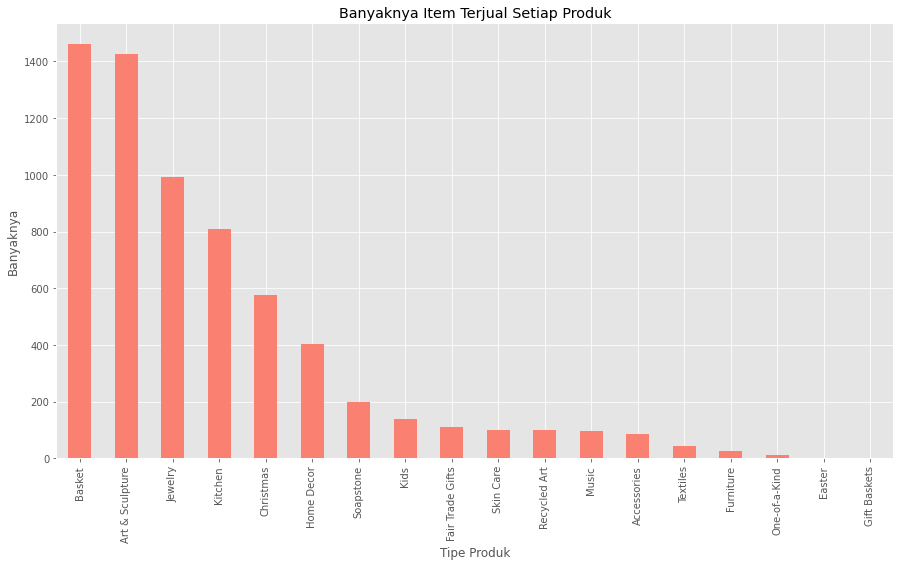

In [12]:
banyak_produk.plot(kind='bar',
                 figsize=(15,8),
                 color = 'salmon')
plt.title('Banyaknya Item Terjual Setiap Produk')
plt.xlabel('Tipe Produk')
plt.ylabel('Banyaknya')
plt.show()

In [13]:
penjualan_produk = df_osb.groupby("Product Type")['Total Net Sales'].sum().sort_values(ascending=False)
penjualan_produk

Product Type
Basket             134,791.39
Art & Sculpture     84,480.85
Jewelry             29,572.95
Home Decor          25,699.99
Kitchen             15,336.82
Christmas           14,460.81
Soapstone            4,629.09
Accessories          3,785.38
Kids                 3,721.34
Recycled Art         3,704.16
Skin Care            2,571.80
Music                2,418.90
Fair Trade Gifts     2,204.67
One-of-a-Kind        2,108.01
Furniture            1,864.96
Textiles             1,679.10
Easter                  34.20
Gift Baskets            19.50
Name: Total Net Sales, dtype: float64

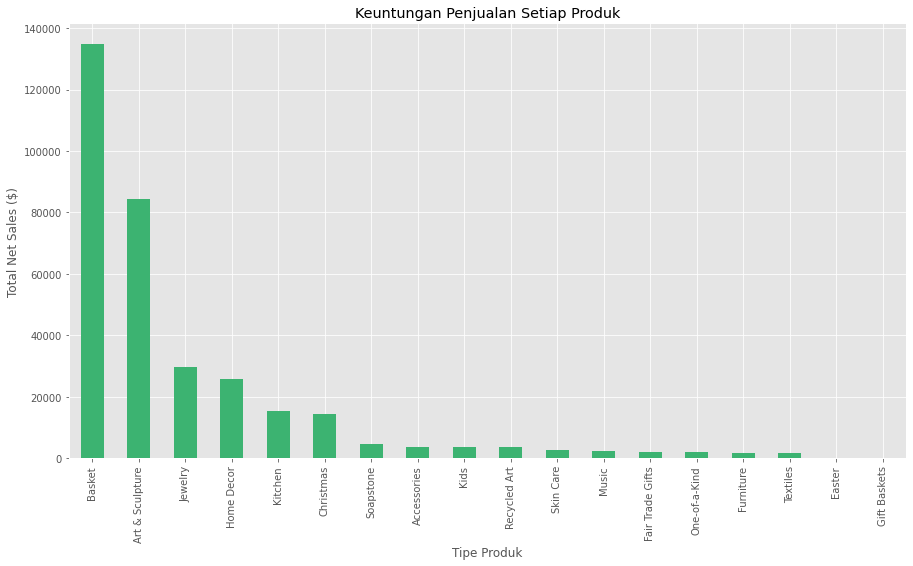

In [103]:
penjualan_produk.plot(kind='bar',
                 figsize=(15,8),
                 color = 'mediumseagreen')
plt.title('Keuntungan Penjualan Setiap Produk')
plt.xlabel('Tipe Produk')
plt.ylabel('Total Net Sales ($)')
plt.show()

## Keuntungan per Item

In [92]:
untung_per_item = penjualan_produk / banyak_produk
untung_per_item.sort_values(ascending=False, inplace=True)
untung_per_item

Product Type
One-of-a-Kind      175.67
Basket              92.26
Furniture           69.07
Home Decor          63.61
Art & Sculpture     59.20
Accessories         45.06
Textiles            39.05
Recycled Art        37.42
Easter              34.20
Jewelry             29.84
Kids                26.58
Skin Care           25.46
Christmas           25.15
Music               24.68
Soapstone           23.26
Fair Trade Gifts    20.04
Gift Baskets        19.50
Kitchen             18.96
dtype: float64

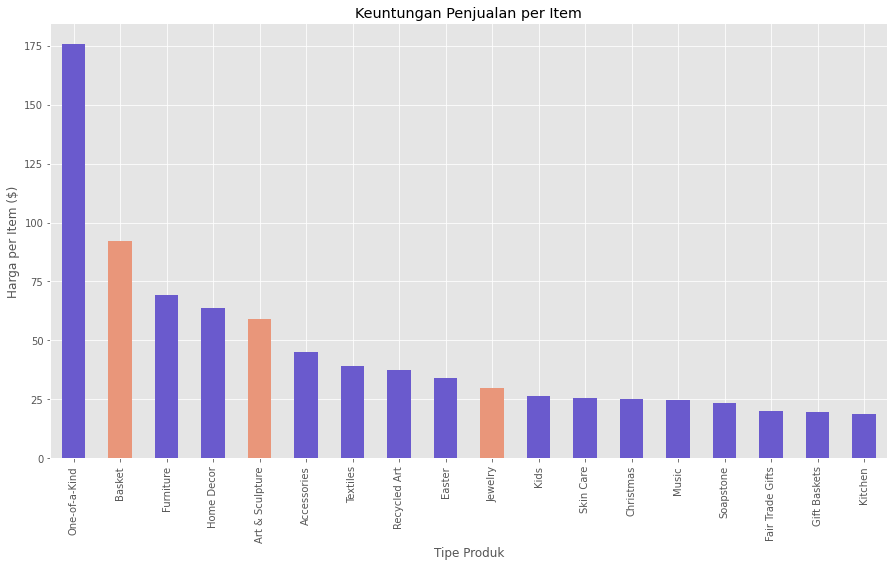

In [94]:
c1 = 'slateblue'
c2 = 'darksalmon'

untung_per_item.plot(kind='bar',
                 figsize=(15,8),
                 color = [c1, c2, c1, c1, c2, c1, c1, c1, c1, c2, c1, c1, c1, c1, c1, c1, c1, c1]
                 )
plt.title('Keuntungan Penjualan per Item')
plt.xlabel('Tipe Produk')
plt.ylabel('Harga per Item ($)')
plt.show()

## Diskon Terbesar

In [96]:
diskon = np.absolute(df_osb.groupby("Product Type")['Discounts'].sum()).sort_values(ascending=False)
diskon

Product Type
Basket             4,584.42
Art & Sculpture    2,955.82
Home Decor           991.21
Jewelry              965.85
Kitchen              431.11
Christmas            345.19
Furniture            169.04
Kids                 116.66
Textiles             112.90
Accessories          107.02
Soapstone             96.91
Recycled Art          88.64
Music                 82.19
One-of-a-Kind         71.99
Fair Trade Gifts      53.33
Skin Care             37.70
Easter                 3.80
Gift Baskets           0.00
Name: Discounts, dtype: float64

In [99]:
gross_sales = df_osb.groupby("Product Type")['Gross Sales'].sum().sort_values(ascending=False)
gross_sales

Product Type
Basket             143,815.50
Art & Sculpture     90,316.60
Jewelry             31,048.00
Home Decor          27,114.55
Kitchen             16,096.00
Christmas           15,476.00
Soapstone            4,795.50
Accessories          3,892.40
Kids                 3,838.00
Recycled Art         3,792.80
Music                2,643.50
Skin Care            2,609.50
Fair Trade Gifts     2,258.00
One-of-a-Kind        2,180.00
Furniture            2,034.00
Textiles             1,889.00
Easter                  38.00
Gift Baskets            19.50
Name: Gross Sales, dtype: float64

In [101]:
persen_diskon = diskon / gross_sales * 100
persen_diskon.sort_values(ascending=False, inplace=True)
persen_diskon

Product Type
Easter             10.00
Furniture           8.31
Textiles            5.98
Home Decor          3.66
One-of-a-Kind       3.30
Art & Sculpture     3.27
Basket              3.19
Jewelry             3.11
Music               3.11
Kids                3.04
Accessories         2.75
Kitchen             2.68
Fair Trade Gifts    2.36
Recycled Art        2.34
Christmas           2.23
Soapstone           2.02
Skin Care           1.44
Gift Baskets        0.00
dtype: float64

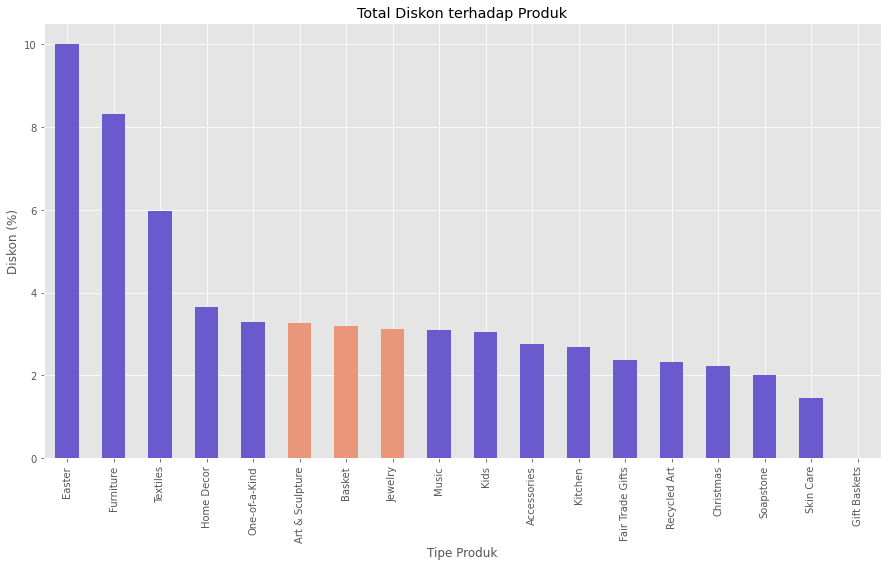

In [105]:
c1 = 'slateblue'
c2 = 'darksalmon'

persen_diskon.plot(kind='bar',
                 figsize=(15,8),
                 color = [c1, c1, c1, c1, c1, c2, c2, c2, c1, c1, c1, c1, c1, c1, c1, c1, c1, c1]
                 )
plt.title('Total Diskon terhadap Produk')
plt.xlabel('Tipe Produk')
plt.ylabel('Diskon (%)')
plt.show()

## Retur Terbesar

In [106]:
retur = np.absolute(df_osb.groupby("Product Type")['Returns'].sum()).sort_values(ascending=False)
retur

Product Type
Basket             4,439.69
Art & Sculpture    2,879.93
Christmas            670.00
Jewelry              509.20
Home Decor           423.35
Kitchen              328.07
Music                142.41
Textiles              97.00
Soapstone             69.50
Kids                   0.00
Gift Baskets           0.00
Furniture              0.00
Fair Trade Gifts       0.00
Easter                 0.00
One-of-a-Kind          0.00
Recycled Art           0.00
Skin Care              0.00
Accessories            0.00
Name: Returns, dtype: float64

In [107]:
persen_retur = retur / gross_sales * 100
persen_retur.sort_values(ascending=False, inplace=True)
persen_retur

Product Type
Music              5.39
Textiles           5.13
Christmas          4.33
Art & Sculpture    3.19
Basket             3.09
Kitchen            2.04
Jewelry            1.64
Home Decor         1.56
Soapstone          1.45
Kids               0.00
Gift Baskets       0.00
Furniture          0.00
Fair Trade Gifts   0.00
Easter             0.00
One-of-a-Kind      0.00
Recycled Art       0.00
Skin Care          0.00
Accessories        0.00
dtype: float64

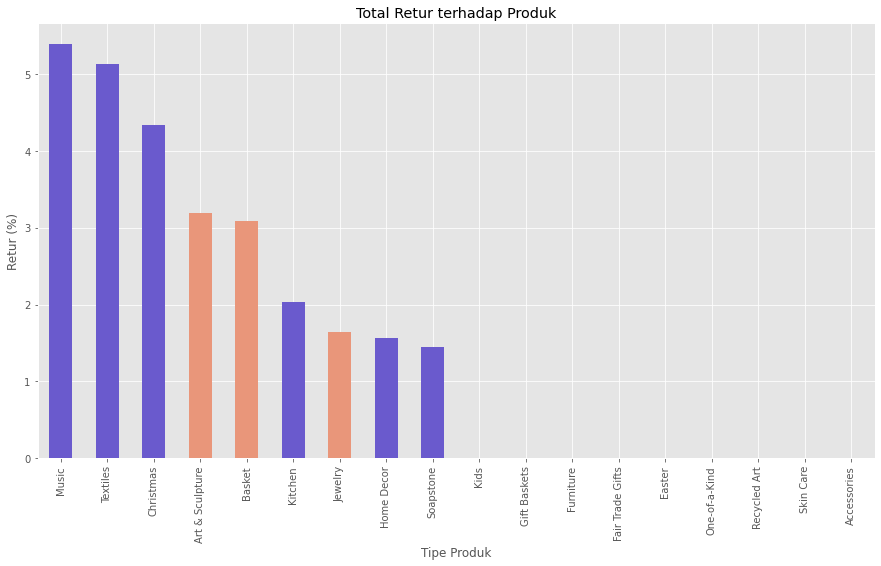

In [109]:
c1 = 'slateblue'
c2 = 'darksalmon'

persen_retur.plot(kind='bar',
                 figsize=(15,8),
                 color = [c1, c1, c1, c2, c2, c1, c2, c1, c1, c1, c1, c1, c1, c1, c1, c1, c1, c1]
                 )
plt.title('Total Retur terhadap Produk')
plt.xlabel('Tipe Produk')
plt.ylabel('Retur (%)')
plt.show()